In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib as mpl
from scipy.io import savemat, loadmat

from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
}

sns.set_theme(context = "notebook", style="ticks", rc=custom_params)

BlueUB = (0, 157/255, 224/255)
BrownUB = (68/255, 58/255, 49/255)

In [57]:
sys.path.append(r"../Overdamped_Langevin_Python/")
from Overdamped_Langevin import Langevin as pyBulk_simu

sys.path.append(r"../Double_Walls_Overdamped_Langevin_Python/")
from DoubleWalls_Overdamped_Langevin import DoubleWallsLangevin as py_simu

sys.path.append(r"../Optimisations")
from Double_Walls_Overdamped_Langevin_Cython import DoubleWallsLangevin_Cy as cy_simu

In [4]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 40e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

dt = 1e-2
Nt = 10_000
Nt_sub = 1

## Compute Cython / Python compute time in function of number of points

In [59]:
import time
from tqdm import tqdm

Ns = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1_000_000, 5000000]

# t_py = np.zeros(len(Ns))
# t_cy = np.zeros(len(Ns))
t_py_bulk = np.zeros(len(Ns))

for n, i in tqdm(enumerate(Ns)):
#     t0 = time.time()
#     python = py_simu(dt=dt, Nt=i, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
#     python.trajectory()
#     t_py[n] = time.time() - t0
    
#     if i==Ns[-1]:
#         print("Plus que le dernier pour Cython")
        
#     t0 = time.time()
#     cython = cy_simu(dt=dt, Nt=i, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
#     cython.trajectory()
#     t_cy[n] = time.time() - t0

        t0 = time.time()
        bulk = pyBulk_simu(dt=dt, Nt=i, a=a)
        bulk.trajectory()
        t_py_bulk[n] = time.time() - t0
    


14it [48:14, 206.76s/it]


## Dictionnary and save datas

In [66]:
# Py_MT = {"Ns": Ns, "t_py": t_py, "label": "Analyse pour Python avec Mersenne Twister"}
# Cy_MT = {"Ns": Ns, "t_cy": t_cy, "label": "Analyse pour Cython avec Mersenne Twister"}
Py_MT_bulk = {"Ns": Ns, "t_py": t_py_bulk, "label": "Analyse pour Python en bulk avec Mersenne Twister"}

#########################################

# savemat("Datas_SpeedTest_CyPy/Pyhton_mersenmeTwister_datas.mat", Py_MT)
# savemat("Datas_SpeedTest_CyPy/Cyhton_mersenneTwister_datas.mat", Cy_MT)
savemat("Datas_SpeedTest_CyPy/Pyhton_Bulk_mersenneTwister_datas.mat", Py_MT_bulk)

## Load datas

In [67]:
Py_numpy =  loadmat("Datas_SpeedTest_CyPy/Pyhton_npRandomUniform_datas.mat", squeeze_me=True )
Py_MT= loadmat("Datas_SpeedTest_CyPy/PyhtonPur_mersenneTwister_datas.mat", squeeze_me=True )
Cy_MT = loadmat("Datas_SpeedTest_CyPy/Cyhton_mersenneTwister_datas.mat", squeeze_me=True )
Py_MT_bulk = loadmat("Datas_SpeedTest_CyPy/Pyhton_Bulk_mersenneTwister_datas.mat", squeeze_me=True )

## Linear fit

In [68]:
def linear(x, a, b):
    return a*x+b

In [69]:
popt_py_numpy, pcov_ty_numpy = curve_fit(linear, Py_numpy["Ns"], Py_numpy["t_py"])
popt_py_MT, pcov_ty_MT = curve_fit(linear, Py_MT["Ns"][:-1], Py_MT["t_py"][:-1])
popt_cy_MT, pcov_cy_MT = curve_fit(linear, Cy_MT["Ns"], Cy_MT["t_py"])
popt_py_MT_bulk, pcov_py_MT_bulk = curve_fit(linear, Py_MT_bulk["Ns"], Py_MT_bulk["t_py"])

## Plot

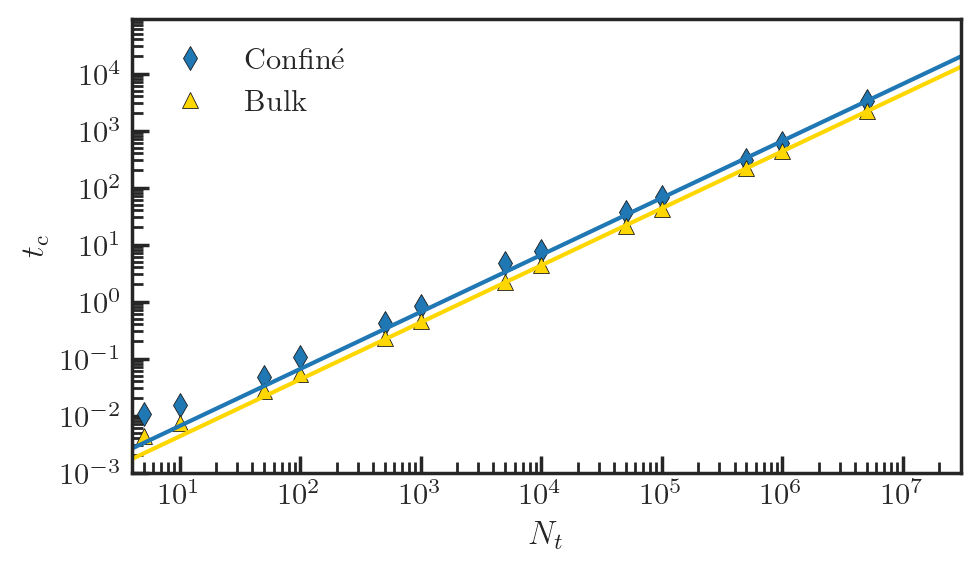

In [86]:
plt.figure(figsize=(1.5 * 3.375, 1.5 * 3.375 / 1.68), tight_layout=True)

ax1 = plt.subplot(111)

# ax1.loglog(Py_numpy["Ns"], Py_numpy["t_py"], "s", color=BrownUB, label="Confiné avec np.rand.uniform()") #np.random.uniform()
ax1.loglog(Py_MT["Ns"][:-1], Py_MT["t_py"][:-1], "d", color="tab:blue", label="Confiné") 
ax1.loglog(Py_MT_bulk["Ns"], Py_MT_bulk["t_py"], "^", color="gold", label="Bulk")

# ax1.plot(np.linspace(1e0, 5e7, 100), [linear(n, popt_py_numpy[0], 0) for n in np.linspace(1e0, 5e7, 100)], "-",  color=BrownUB,)
ax1.plot(np.linspace(1e0, 5e7, 100), [linear(n, popt_py_MT[0], 0) for n in np.linspace(1e0, 5e7, 100)], "-",  color="tab:blue",)
ax1.plot(np.linspace(1e0, 5e7, 100), [linear(n, popt_py_MT_bulk[0], 0) for n in np.linspace(1e0, 5e7, 100)], "-",  color="gold",)

ax1.set(
    xlabel = r"$N_t$",
    ylabel = r"$t_\mathrm{c}$",
)
ax1.set_xlim(4, 3e7)
ax1.set_ylim(1e-3, None)
plt.legend(loc='upper left', frameon=False)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax1.xaxis.set_major_locator(locmaj)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

fig.tight_layout()
plt.savefig("Figures/speed_test_Python.pdf")

In [90]:
popt_py_MT[0]/popt_py_MT_bulk[0]

1.5220470451676262

In [101]:
popt_py_MT[0], popt_py_MT_bulk[0]

(0.0006604244627066231, 0.0004339054202059104)

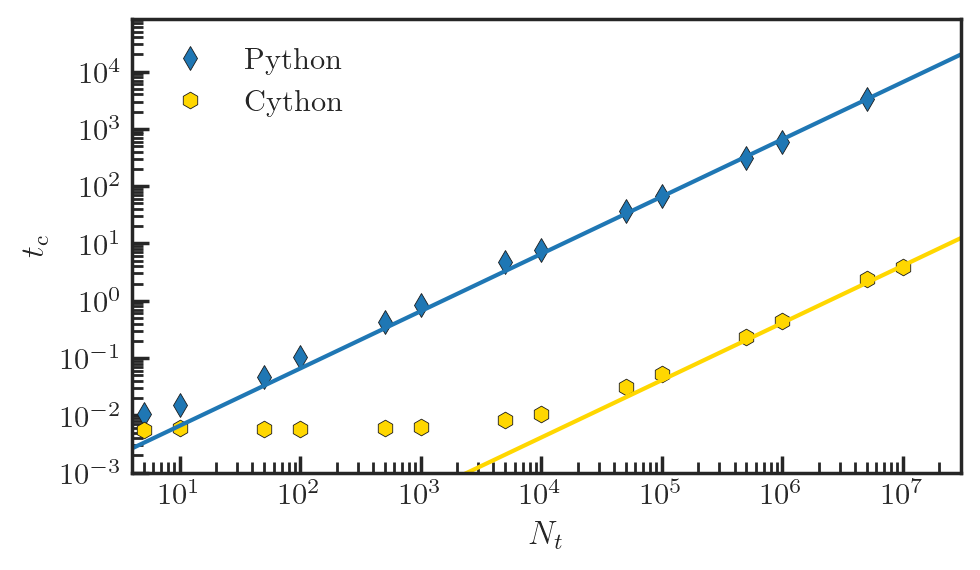

In [96]:
plt.figure(figsize=(1.5 * 3.375, 1.5 * 3.375 / 1.68), tight_layout=True)

ax1 = plt.subplot(111)

ax1.loglog(Py_MT["Ns"][:-1], Py_MT["t_py"][:-1], "d", color="tab:blue", label="Python") 
ax1.loglog(Cy_MT["Ns"], Cy_MT["t_py"], "h", color="gold", label="Cython")

ax1.plot(np.linspace(1e0, 5e7, 100), [linear(n, popt_py_MT[0], 0) for n in np.linspace(1e0, 5e7, 100)], "-",  color="tab:blue",)
ax1.plot(np.linspace(1e3, 5e7, 100), [linear(n, popt_cy_MT[0], 0) for n in np.linspace(1e3, 5e7, 100)], "-",  color="gold",)

ax1.set(
    xlabel = r"$N_t$",
    ylabel = r"$t_\mathrm{c}$",
)
ax1.set_xlim(4, 3e7)
ax1.set_ylim(1e-3, None)
plt.legend(loc='upper left', frameon=False)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax1.xaxis.set_major_locator(locmaj)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1, numticks=100)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

fig.tight_layout()
plt.savefig("Figures/speed_test_Cython.pdf")

In [91]:
popt_py_MT[0]/popt_cy_MT[0]

1604.714540823559

In [99]:
popt_py_MT[0], popt_cy_MT[0]

(0.0006604244627066231, 4.11552613194173e-07)